In [27]:
# Import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default asthetic parameters.
sns.set()

# Define data path
data_path = "../data/"

In [28]:
# Load orders dataset.
orders = pd.read_csv(data_path+'olist_order_items_dataset.csv')

# Load products items dataset.
products = pd.read_csv(data_path+'olist_products_dataset.csv')

# Load translations dataset.
translations = pd.read_csv(data_path+'product_category_name_translation.csv')

In [29]:
# Print orders header.
orders.head()

,order_id,order_item_id,product_id,price
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9


In [21]:
# Print orders info.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [22]:
# Print products header.
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [23]:
# Print products info.
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32341 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [24]:
# Print translations header.
translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [25]:
# Print translations info.
translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


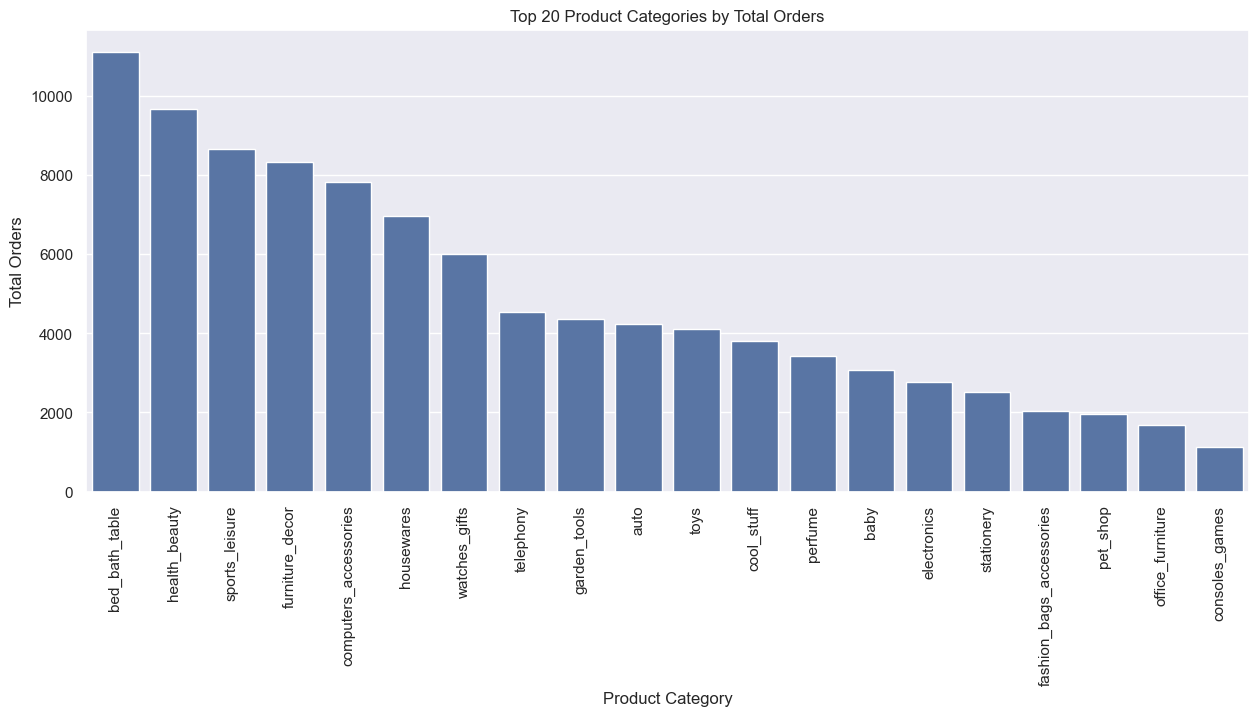

In [26]:
# Merge orders and products datasets.
orders_products = pd.merge(orders, products, on='product_id', how='left')

# Merge with translations dataset.
orders_products = pd.merge(orders_products, translations, on='product_category_name', how='left')

# Group by product category and count the number of orders.
product_order_counts = orders_products.groupby('product_category_name_english')['order_id'].count().reset_index()

# Rename the columns
product_order_counts.columns = ['Product Category', 'Total Orders']

# Sort the product categories by total orders in descending order
product_order_counts = product_order_counts.sort_values(by='Total Orders', ascending=False)

# Plot the frequency of total orders by product category
plt.figure(figsize=(15, 6))
sns.barplot(x='Product Category', y='Total Orders', data=product_order_counts.head(20))
plt.xticks(rotation=90)
plt.xlabel('Product Category')
plt.ylabel('Total Orders')
plt.title('Top 20 Product Categories by Total Orders')
plt.show()


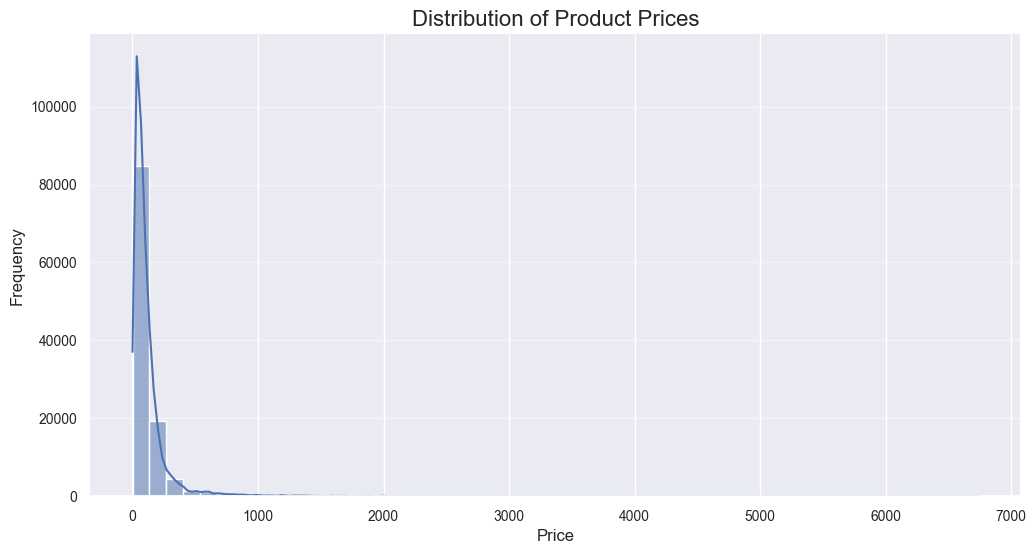

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'orders_products' DataFrame from the previous code is available

# Sort products by price
orders_products_sorted = orders_products.sort_values(by='price')

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
sns.histplot(orders_products_sorted['price'], bins=50, kde=True)  # Use a histogram with KDE for better visualization

# Customize the plot for better aesthetics
plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.5)  # Add a subtle grid for better readability
sns.despine(left=True)  # Remove the top and right spines for a cleaner look

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_weight_g   32949 non-null  float64
 1   product_length_cm  32949 non-null  float64
 2   product_height_cm  32949 non-null  float64
 3   product_width_cm   32949 non-null  float64
dtypes: float64(4)
memory usage: 1.0 MB
None
       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000

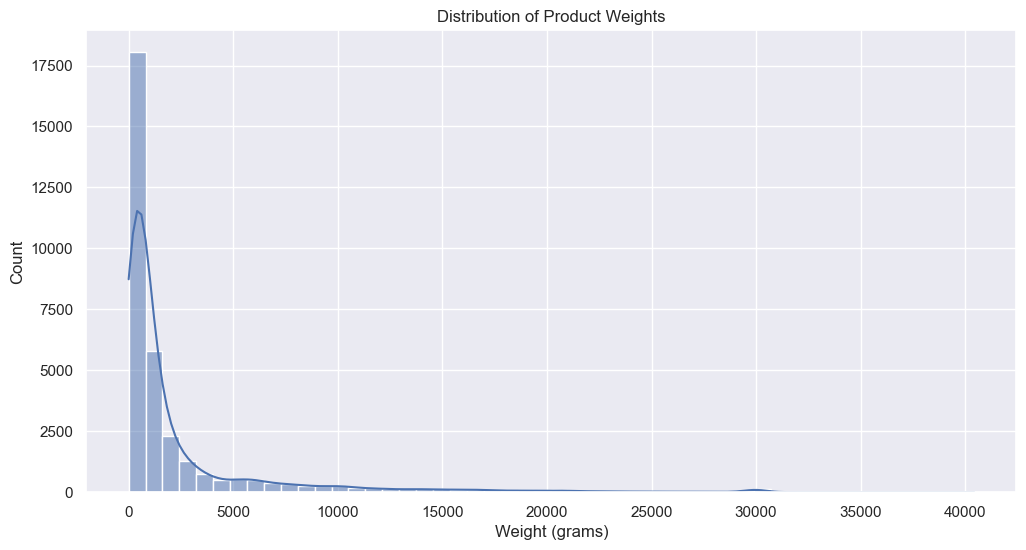

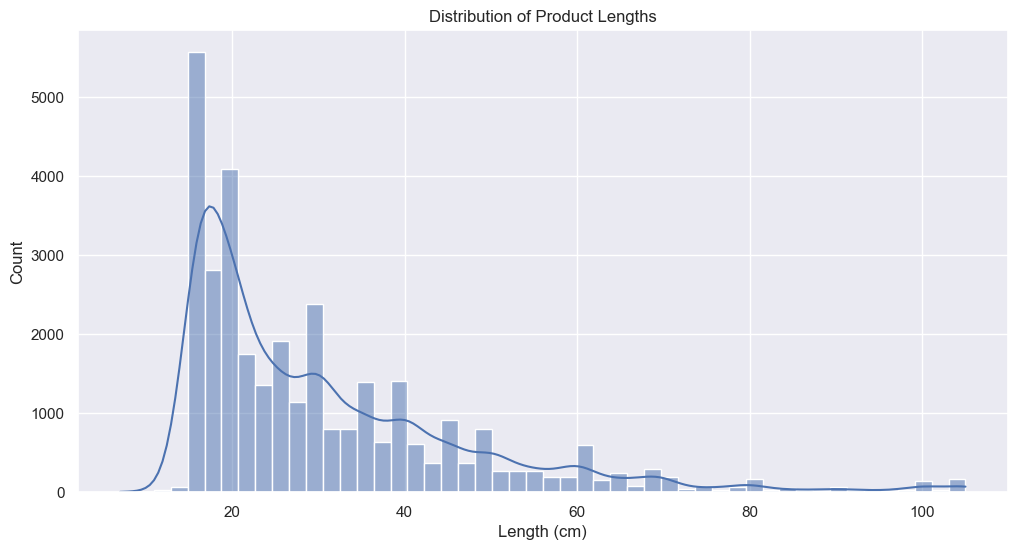

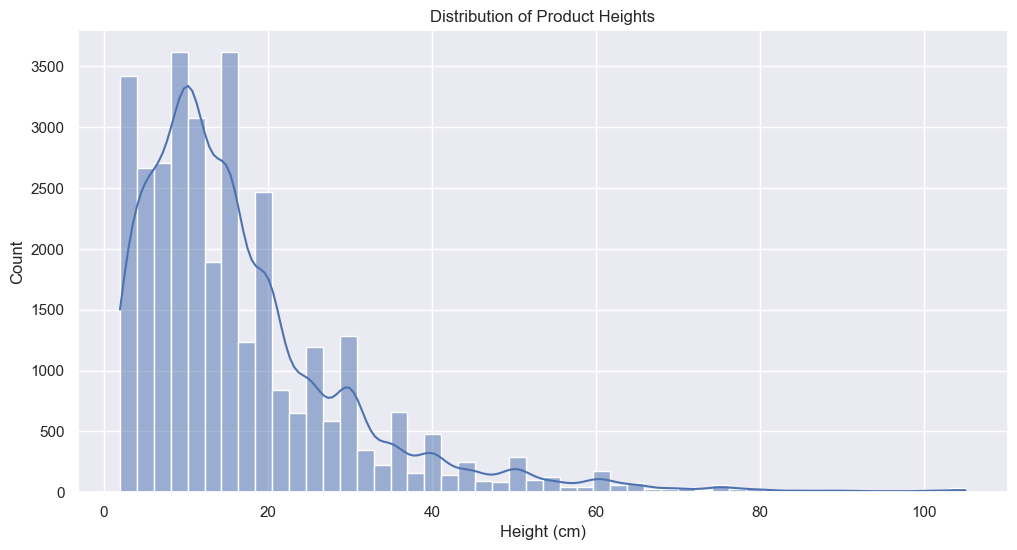

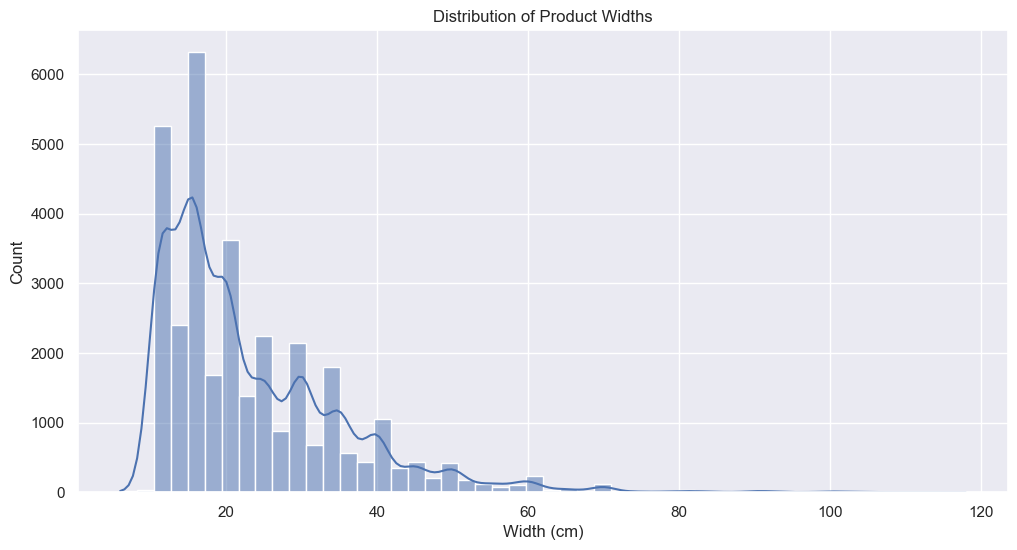

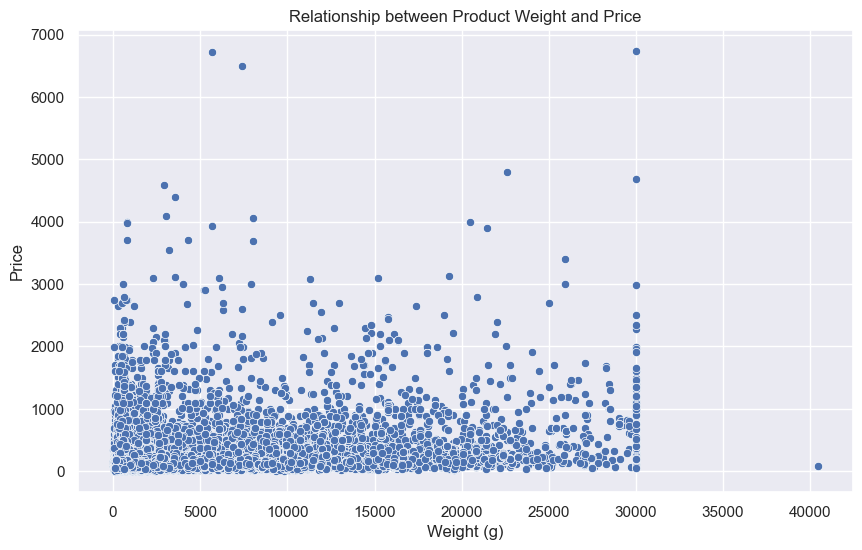

In [34]:
# Analyze product dimensions (weight, height, width)
# Check for missing values and data types
print(products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].info())

# Summary statistics
print(products[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].describe())

# Visualize distributions
plt.figure(figsize=(12, 6))
sns.histplot(products['product_weight_g'], bins=50, kde=True)
plt.title('Distribution of Product Weights')
plt.xlabel('Weight (grams)')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(products['product_length_cm'], bins=50, kde=True)
plt.title('Distribution of Product Lengths')
plt.xlabel('Length (cm)')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(products['product_height_cm'], bins=50, kde=True)
plt.title('Distribution of Product Heights')
plt.xlabel('Height (cm)')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(products['product_width_cm'], bins=50, kde=True)
plt.title('Distribution of Product Widths')
plt.xlabel('Width (cm)')
plt.show()


# Calculate volume and density (if weight is available)
products['product_volume_cm3'] = products['product_length_cm'] * products['product_height_cm'] * products['product_width_cm']
products['product_density_g_cm3'] = products['product_weight_g'] / products['product_volume_cm3']

# Analyze relationships between dimensions and other variables like price or category.
# Example: Relationship between weight and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_weight_g', y='price', data=orders_products) # assuming you merged products with orders_products
plt.title('Relationship between Product Weight and Price')
plt.xlabel('Weight (g)')
plt.ylabel('Price')
plt.show()


# Further analysis can be done by product category.
# Consider handling outliers and missing values more effectively before drawing conclusions.
